In [37]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.seasonal import DecomposeResult


In [35]:
eurgbp = pd.read_csv('eurgbp data.csv', index_col=0, parse_dates=True)["2024-06-01":]
eurgbp["returns"] = eurgbp["close"].pct_change()
eurgbp["rolling_sd"] = eurgbp["close"].rolling(120).std()
eurgbp.dropna(inplace=True)

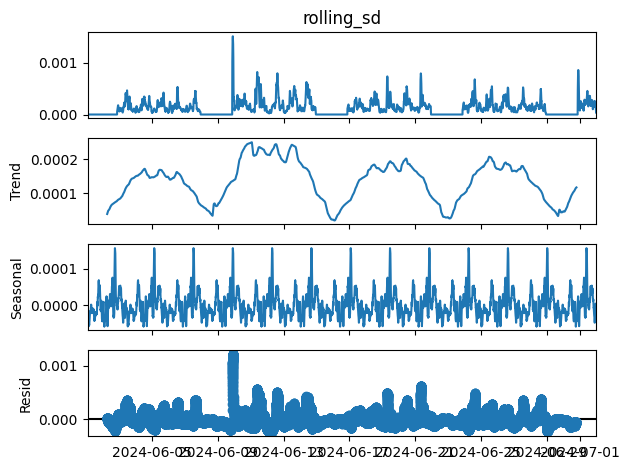

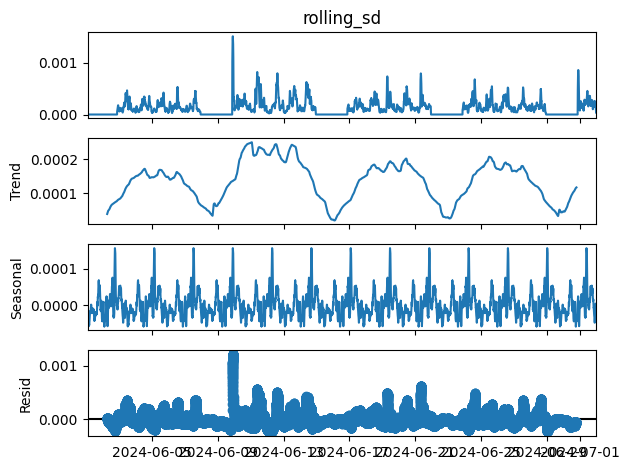

In [36]:
decomposition = seasonal_decompose(eurgbp['rolling_sd'], model='additive', period=3440)
decomposition.plot()

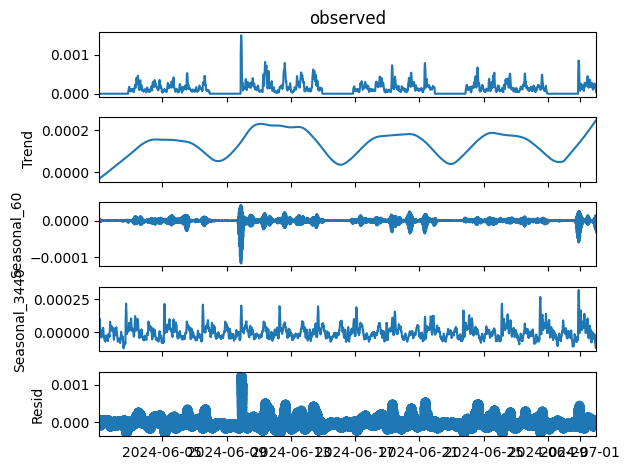

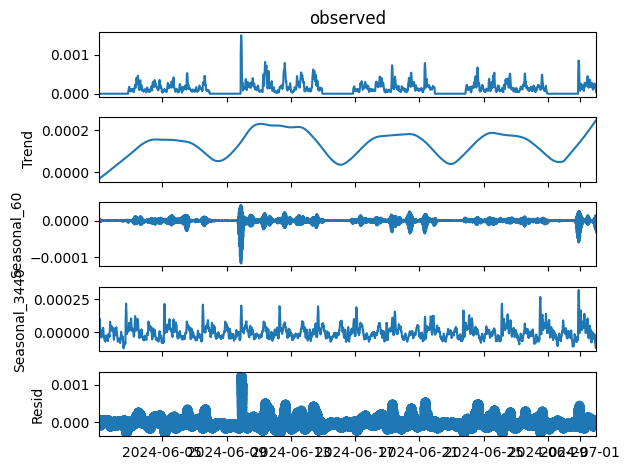

In [38]:
mstl = MSTL(eurgbp['rolling_sd'], periods=[60, 3440 ])
res = mstl.fit()
res.plot()

<Axes: title={'center': 'Seasonal component of the 3440 period'}, xlabel='timestamp'>

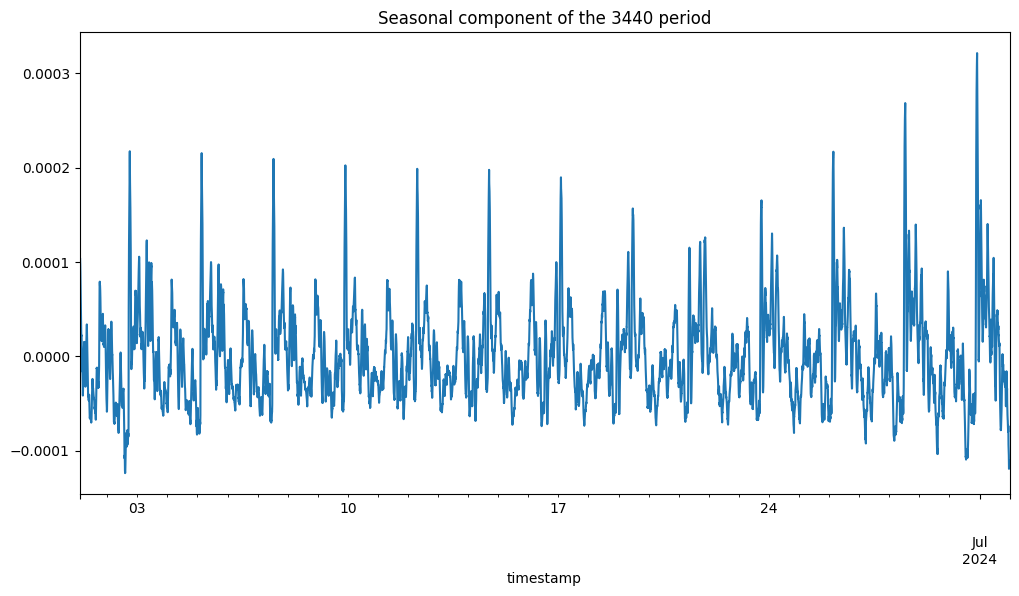

In [45]:
res.seasonal.head()
res.seasonal["seasonal_3440"].plot(figsize=(12, 6), title="Seasonal component of the 3440 period")